## HELP International_Clustering Model

Business Case: HELP International has raised around $10 Mn as part of its funding programmes. It wants to make a strategic and effective decision to select those countries that are in the direst need of aid and where this money can be used most effectively.

Business Approach: HELP International has provided a data that comprises of socio-economic factors for a list of 167 countries that are expected to be in need of aid. Based on the Clustering model approach and with the support of analytical inferences, business shall zero-down on the final list of countries.

Pre-Clustering Hypothesis of the features of countries that shall qualify for aid:
1. The countries have low nominal GDP resulting in high inflation
2. Due to low nominal GDP, the countries have high imports and possibly low exports
3. These countries could have low net income per person due to which the buying capacity is low. Hence, the countries that  might qualify could also have low inflation  
2. The countries have high mortality rate
3. High mortality rate could be due to low health expenditure per capita
4. High mortality rate could be due to high fertility rate faced by these countries
5. These countries have low health expenditure that ultimately results in low life expectancy

## Steps Involved:
1. Data Import
2. EDA
    2.1 Missing value identification
    2.2 Outlier detection
3. Hopkins Statistics-Verification of the health of the data for clustering 
4. Scaling
5. K-Means Clustering
    5.1 Elbow-curve/SSD Method
    5.2 Sihouette Score Method
6. Cluster Profiling_KMeans Cluster
7. Hierarchical Clustering
8. Cluster Profiling_Hierarchical Clustering


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Step1: Data Import

In [2]:
countrydata=pd.read_csv(r"Country-data.csv",sep=',')
countrydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Step2: EDA

In [3]:
countrydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
#Missing Value Identification
countrydata.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Since there are columns that have % values or relative values,hence, converting columns like 'exports', 'health', 'imports' into absolute values.

In [5]:
countrydata['export_abs']=round(countrydata['exports']*countrydata['gdpp']/100,0)
countrydata['health_abs']=round(countrydata['health']*countrydata['gdpp']/100,0)
countrydata['imports_abs']=round(countrydata['imports']*countrydata['gdpp']/100,0)
countrydata.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,export_abs,health_abs,imports_abs
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.0,42.0,248.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.0,268.0,1988.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1713.0,186.0,1400.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.0,101.0,1514.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.0,736.0,7186.0


Dropping the original columns 'exports', 'health', 'imports'

In [6]:
countrydata.drop('exports',axis=1,inplace=True)
countrydata.drop('imports',axis=1,inplace=True)
countrydata.drop('health',axis=1,inplace=True)
countrydata.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export_abs,health_abs,imports_abs
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.0,42.0,248.0
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.0,268.0,1988.0
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1713.0,186.0,1400.0
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.0,101.0,1514.0
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.0,736.0,7186.0


In [7]:
#Renaming the newly formed columns with the respective original column names
countrydata=countrydata.rename(columns={'export_abs':'exports','health_abs':'health','imports_abs':'imports'})
countrydata.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.0,42.0,248.0
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.0,268.0,1988.0
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1713.0,186.0,1400.0
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.0,101.0,1514.0
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.0,736.0,7186.0


##### 2.1 Univariate Analysis

In [8]:
#enumerate assigns an index# to each columns in the plot
feature=countrydata.columns[1:]
for i in enumerate(feature):        
    print(i)

(0, 'child_mort')
(1, 'income')
(2, 'inflation')
(3, 'life_expec')
(4, 'total_fer')
(5, 'gdpp')
(6, 'exports')
(7, 'health')
(8, 'imports')


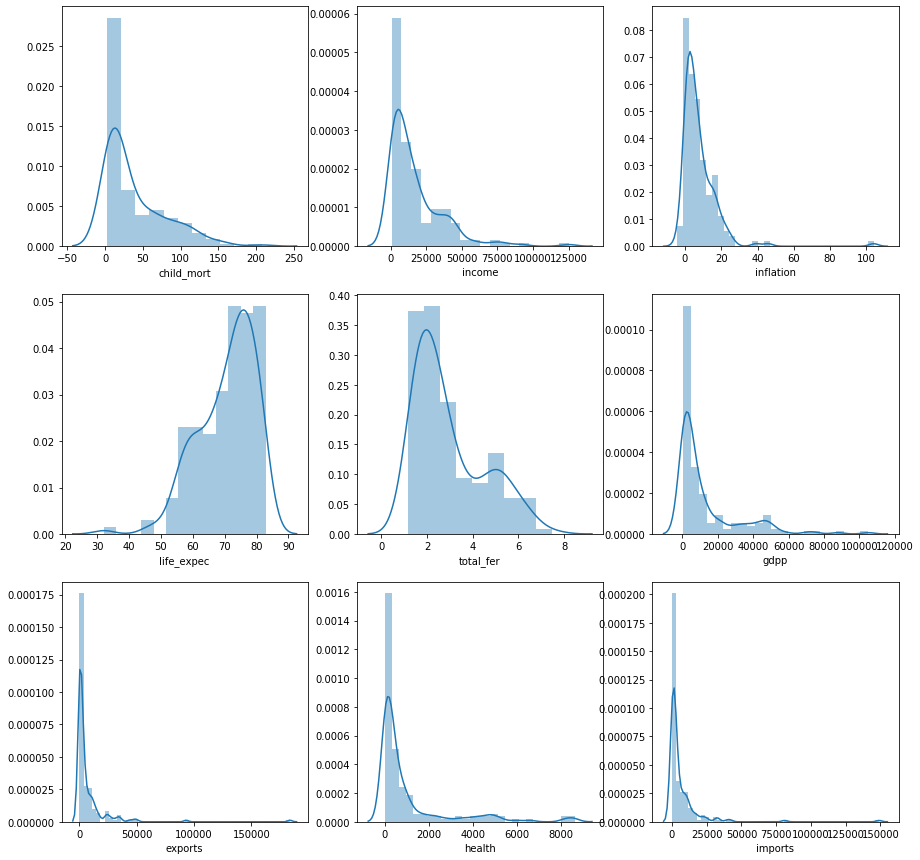

In [9]:
# Creating histograms to understand the distribution of numeric variables
plt.figure(figsize=(15,15))
feature=countrydata.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(countrydata[i[1]])

#### Columns like 'child_mort', 'income', 'life_expec' ,'total_fer', & 'gdpp' display some variation in their distribution. Columns for 'child_mort', 'income', & 'gdpp' shall be used for cluster profiling.

##### 2.2 Outlier Treatment

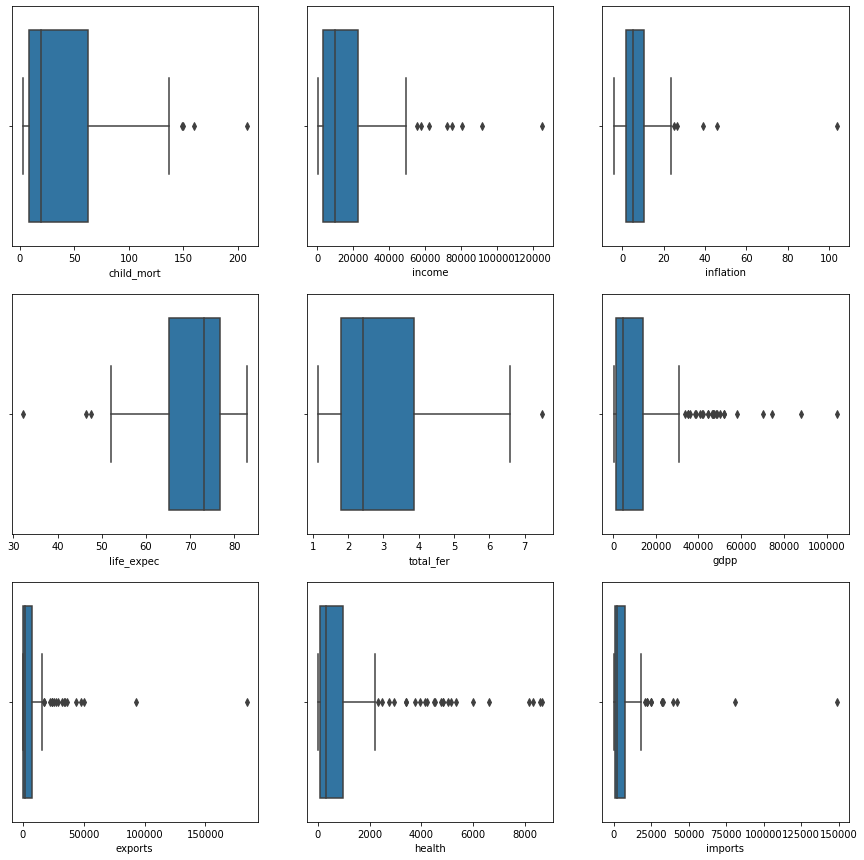

In [10]:
#Boxplot
plt.figure(figsize=(15,15))
feature=countrydata.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(countrydata[i[1]])
plt.show()

In [11]:
#capping the outliers either with a soft capping of 1-99 or a mid range capping of 5-95
q4 = countrydata['exports'].quantile(0.95)
countrydata['exports'][countrydata['exports']>= q4] = q4

q4 = countrydata['health'].quantile(0.95)
countrydata['health'][countrydata['health']>= q4] = q4

q4 = countrydata['imports'].quantile(0.95)
countrydata['imports'][countrydata['imports']>= q4] = q4

q4 = countrydata['income'].quantile(0.95)
countrydata['income'][countrydata['income']>= q4] = q4

q4 = countrydata['inflation'].quantile(0.95)
countrydata['inflation'][countrydata['inflation']>= q4] = q4

q4 = countrydata['total_fer'].quantile(0.99)
countrydata['total_fer'][countrydata['total_fer']>= q4] = q4

q4 = countrydata['gdpp'].quantile(0.95)
countrydata['gdpp'][countrydata['gdpp']>= q4] = q4

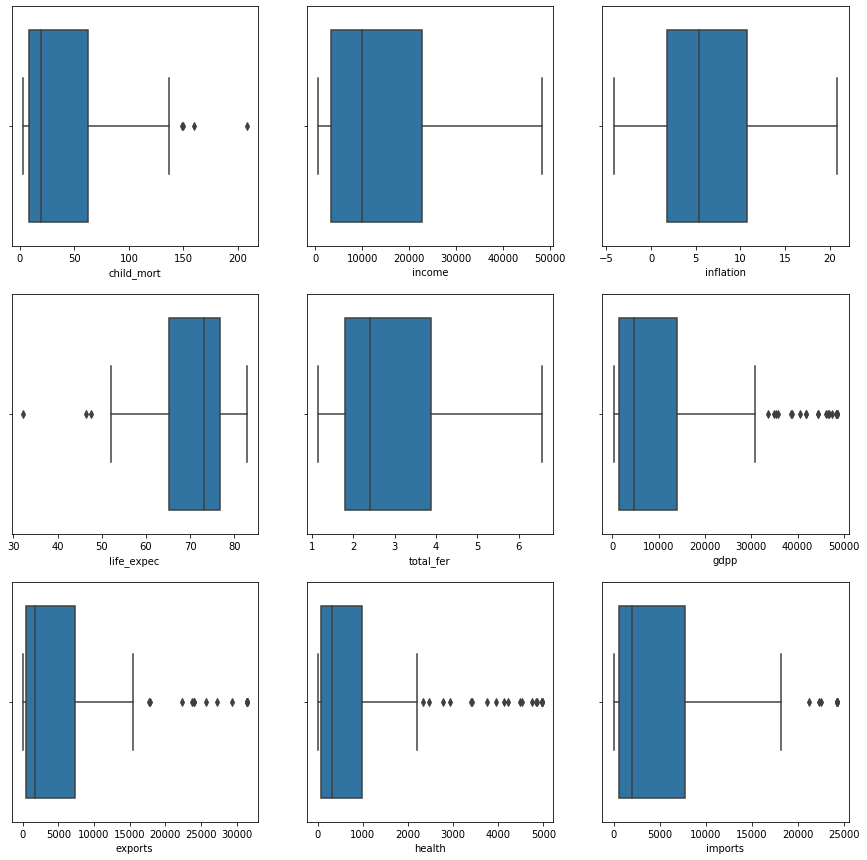

In [12]:
#Boxplot post capping
plt.figure(figsize=(15,15))
feature=countrydata.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(countrydata[i[1]])
plt.show()

In [13]:
countrydata.describe()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,15738.760479,6.929317,70.555689,2.942259,11998.826347,5783.113174,954.032335,5140.128743
std,40.328931,14787.154215,6.384357,8.893172,1.498340,15158.213199,8580.069958,1453.431525,6696.191322
min,2.600000,609.000000,-4.210000,32.100000,1.150000,231.000000,1.000000,13.000000,1.000000
25%,8.250000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.000000,78.500000,640.000000
50%,19.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.000000,322.000000,2046.000000
75%,62.100000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7278.000000,977.000000,7719.500000
max,208.000000,48290.000000,20.870000,82.800000,6.563600,48610.000000,31385.100000,4966.600000,24241.500000


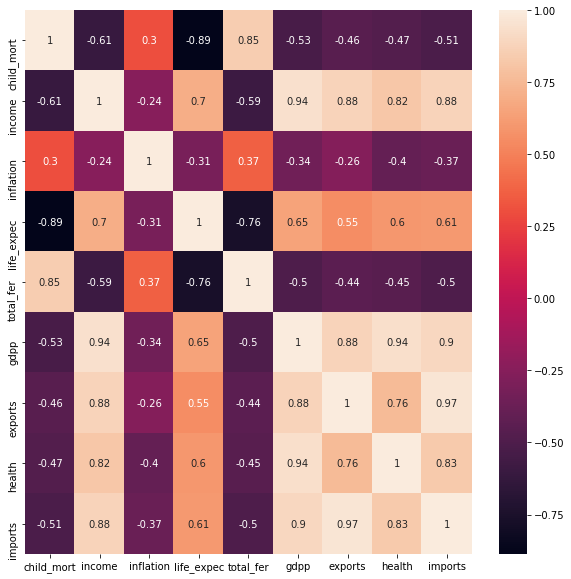

In [14]:
#Correlation matrix to understand relationship between variables 
plt.figure(figsize=(10,10))
sns.heatmap(countrydata.corr(),annot=True)
plt.show()

## Step 3: Clustering 

In [24]:
# Calculating Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
hopkins(countrydata.drop('country',axis = 1))

0.9080936785289315

The Hopkins score of 91% is after more than 20 iterations. Hence, the data can be claimed to have high tendency to be used for clustering

### Step4: Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(countrydata.drop('country',axis=1))
df

array([[ 1.29153238, -0.95834891,  0.3944381 , ..., -0.66961466,
        -0.62939002, -0.73278103],
       [-0.5389489 , -0.3940062 , -0.38322633, ..., -0.542194  ,
        -0.47342829, -0.47215032],
       [-0.27283273, -0.19255214,  1.44075024, ..., -0.47579497,
        -0.53001617, -0.56022552],
       ...,
       [-0.37231541, -0.76299951,  0.81233454, ..., -0.56580773,
        -0.5962654 , -0.61250145],
       [ 0.44841668, -0.76367781,  2.19013596, ..., -0.63010256,
        -0.61144752, -0.70237411],
       [ 1.11495062, -0.84507339,  1.110832  , ..., -0.61291831,
        -0.59902579, -0.70237411]])

In [27]:
df=pd.DataFrame(df,columns=countrydata.columns[:-1])
df.head()
#df.shape

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health
0,1.291532,-0.958349,0.394438,-1.619092,1.926396,-0.757362,-0.669615,-0.629390,-0.732781
1,-0.538949,-0.394006,-0.383226,0.647866,-0.865054,-0.523321,-0.542194,-0.473428,-0.472150
2,-0.272833,-0.192552,1.440750,0.670423,-0.034983,-0.498838,-0.475795,-0.530016,-0.560226
3,2.007808,-0.667360,2.190136,-1.179234,2.153997,-0.560376,-0.418982,-0.588674,-0.543150
4,-0.695634,0.227992,-0.862393,0.704258,-0.543736,0.013312,-0.027134,-0.150463,0.306446


### Step5: Modelling

#### Step5.1: K-Means Clusters

 Identifying the # of clusters using the following methods:
 Elbow-curve/SSD
 Silhouette Score


In [28]:
#k-means with some arbitrary k
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 3, 2, 0, 0, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       3, 2, 2, 2, 2, 1, 1, 0, 2, 3, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 3, 2, 2, 2, 1, 3, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 3, 2, 1, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       3, 0, 1, 1, 3, 0, 1, 2, 2, 2, 2, 2, 0, 3, 2, 2, 1, 2, 0, 1, 2, 0,
       1, 3, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 3, 3, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 3, 0, 0, 2, 2, 2, 2, 2, 1, 1])

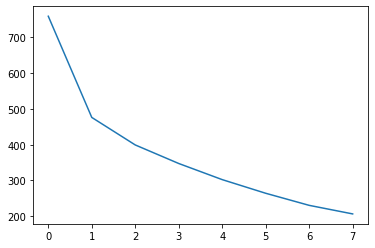

In [30]:
#Elbow-curve/SSD Method to identify the # of optimal clusters
ssd=[]
cluster_range=[2,3,4,5,6,7,8,9]
for num_clusters in cluster_range:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(df)
    
    ssd.append(kmeans.inertia_)
# Plot SSDs for each cluster
plt.plot(ssd)

Based on the elbow-curve achieved, it can be deduced that the data can be well explained by dividing it into 4 clusters. Since the slope of the curve does not drop significantly post the 4th elbow, this infers that 4 clusters shall be capable to explain cluster features.

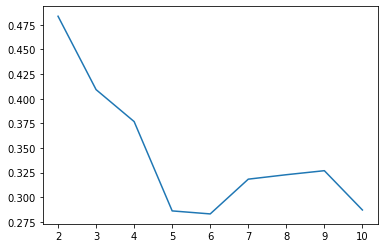

In [31]:
#Silhouette Analysis to identify the # of optimal clusters. It is a measure of goodness of the clusters so created.
from sklearn.metrics import silhouette_score
ss=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k).fit(df)
    ss.append([k,silhouette_score(df,kmeans.labels_)])

temp = pd.DataFrame(ss)
plt.plot(temp[0],temp[1])

The peak of the Silhouette score is 2. Based on industrywide practice it is not suggestive to explain data in 2 clusters. Hence, it is advisable that the next available value of cluster is selected. In this case, the next available score is 3. Therefore, the Silhouette score suggests that the data can be well explained in 3 clusters.    

### Final number of clusters calculated is k=3

In [32]:
#K-Means Clustering with k=3
kmeans=KMeans(n_clusters=3,random_state=50)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [33]:
#Creating copy of the parent data
countrydata_kmeans=countrydata.copy()

In [34]:
# Creating a column to specify the cluster labels
kmeans_clusterid=pd.DataFrame(kmeans.labels_,columns=['kmeans_clusterid'])
kmeans_clusterid.head()

,kmeans_clusterid
0,2
1,0
2,0
3,2
4,0


In [35]:
countrydata_kmeans

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553,55.0,42.0,248.0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090,1145.0,268.0,1988.0
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460,1713.0,186.0,1400.0
3,Angola,119.0,5900.0,20.87,60.1,6.16,3530,2199.0,101.0,1514.0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200,5551.0,736.0,7186.0
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,2950.0,2.62,63.0,3.50,2970,1384.0,156.0,1565.0
163,Venezuela,17.1,16500.0,20.87,75.4,2.47,13500,3848.0,663.0,2376.0
164,Vietnam,23.3,4490.0,12.10,73.1,1.95,1310,943.0,90.0,1051.0
165,Yemen,56.3,4480.0,20.87,67.5,4.67,1310,393.0,68.0,451.0


In [36]:
##Assigning labels to the parent data by concatenating the cluster labels with the parent data
countrydata_kmeans=pd.concat([countrydata_kmeans,kmeans_clusterid],axis=1)
countrydata_kmeans.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,kmeans_clusterid
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553,55.0,42.0,248.0,2
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090,1145.0,268.0,1988.0,0
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460,1713.0,186.0,1400.0,0
3,Angola,119.0,5900.0,20.87,60.1,6.16,3530,2199.0,101.0,1514.0,2
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200,5551.0,736.0,7186.0,0


In [37]:
#Summary of the volume of 3 clusters identifued using k-means
countrydata_kmeans.kmeans_clusterid.value_counts()

0    82
2    48
1    37
Name: kmeans_clusterid, dtype: int64

#Summary of the volume of 4 clusters identifued using k-means
Cluster 0= 54 datapoints
Cluster 1= 42 datapoints
Cluster 2= 27 datapoints
Cluster 3= 34 datapoints

##### Summary Statistics of the distribution of the clusters identified using K-Means

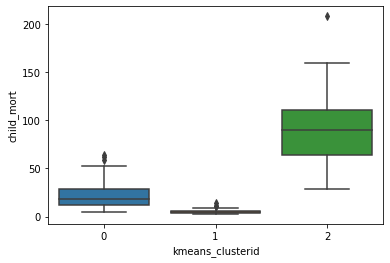

In [38]:
sns.boxplot(x='kmeans_clusterid',y='child_mort',data=countrydata_kmeans)

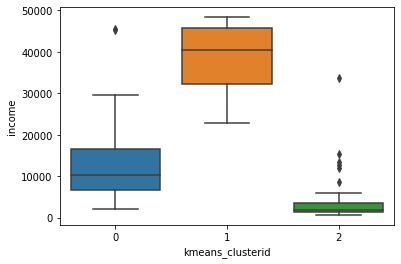

In [39]:
sns.boxplot(x='kmeans_clusterid',y='income',data=countrydata_kmeans)

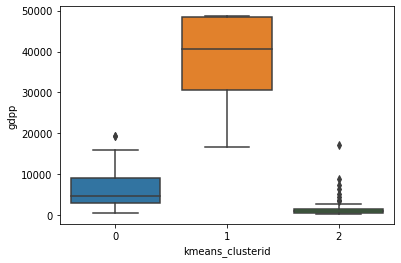

In [40]:
sns.boxplot(x='kmeans_clusterid',y='gdpp',data=countrydata_kmeans)

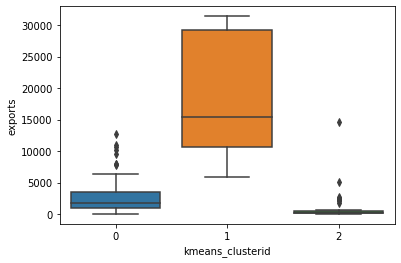

In [41]:
sns.boxplot(x='kmeans_clusterid',y='exports',data=countrydata_kmeans)

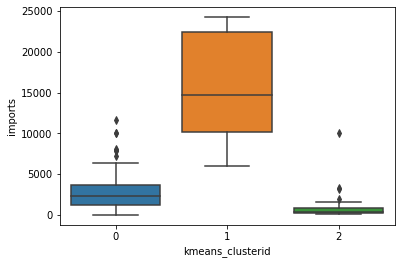

In [42]:
sns.boxplot(x='kmeans_clusterid',y='imports',data=countrydata_kmeans)

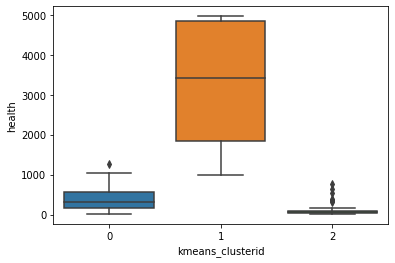

In [43]:
sns.boxplot(x='kmeans_clusterid',y='health',data=countrydata_kmeans)

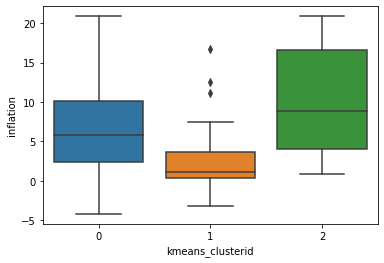

In [44]:
sns.boxplot(x='kmeans_clusterid',y='inflation',data=countrydata_kmeans)

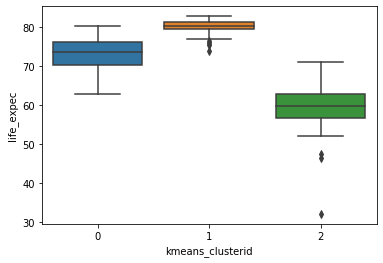

In [45]:
sns.boxplot(x='kmeans_clusterid',y='life_expec',data=countrydata_kmeans)

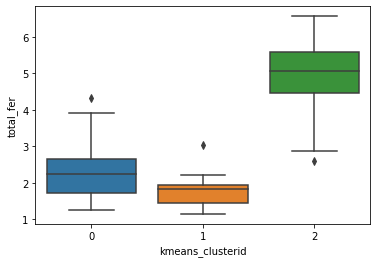

In [46]:
sns.boxplot(x='kmeans_clusterid',y='total_fer',data=countrydata_kmeans)

##### Visualization of the variables to be used for cluster profiling

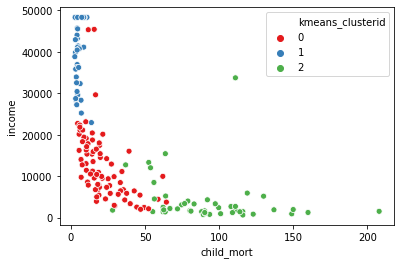

In [47]:
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'kmeans_clusterid', data = countrydata_kmeans, palette = 'Set1')

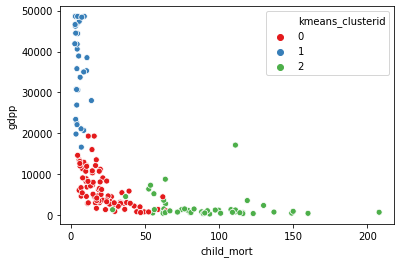

In [48]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'kmeans_clusterid', data = countrydata_kmeans, palette = 'Set1')

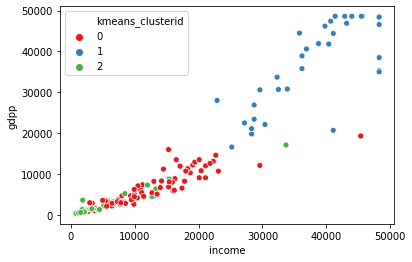

In [49]:
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'kmeans_clusterid', data = countrydata_kmeans, palette = 'Set1')

### Inferences with 3 clusters identified using Silhouette Scoring

#Boxplot depicting cluster feature for child mortality 
Cluster 2 has a wide range of datapoints as compared to other clusters. In other words, the clusters '0' & '1' have small range of datapoints for child_mort.

#Boxplot depicting cluster feature for net income per person
Cluster 1 has maximum range of datapoints. This infers that cluster 1 comprises of countries that have a wider range of net income per person than cluster 1. Cluster 2 has the lowest range of income variation. However, it does have many outliers.

#Boxplot depicting cluster feature for nominal GDP
Similar to the boxplot depiction for 'net income', Cluster 1 again represents high range of GDP per capita followed by cluster1. It can be inferrred so far that the countries featured in cluster 2 have high child mortality rate with low net income per person and low nominal GDP.   

### Inferences with 4 clusters identified using Elbow-Curve/SSD

Cluster 3 has datapoint that have high GDP per capita, total health spending per capita, exports, and income. However, it has compartively lower datapoint ranges for fertility rate, life expectancy, inflation, and child mortality rate. Cluster 1 and 2 depict almost similar data distribution in terms of life expectancy, GDP,income, and fertility rate.    

## Step6: Cluster Profiling_KMeans Clustering.Identified clusters k=3

In [50]:
countrydata_kmeans.drop('country',axis=1).groupby('kmeans_clusterid').mean()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
kmeans_clusterid,,,,,,,,,
0,21.951220,12304.756098,7.155354,72.937805,2.289390,6287.463415,2789.182927,393.073171,2900.536585
1,5.237838,38711.081081,2.588432,79.956757,1.755676,37745.675676,18780.375676,3285.929730,15698.851351
2,91.610417,3897.354167,9.889271,59.239583,4.972233,1909.208333,879.020833,114.833333,827.083333


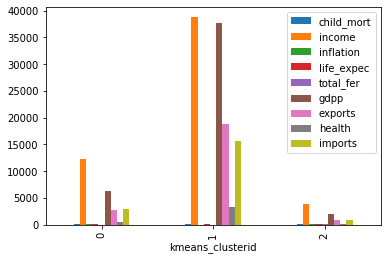

In [51]:
countrydata_kmeans.groupby('kmeans_clusterid').mean().plot(kind='bar')

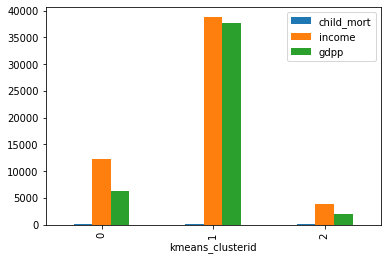

In [52]:
# For efficient cluster profiling, reducing cluster features to:
#'child mortality rate', 'nominal GDP', & 'net income per person' 
countrydata_kmeans.drop(['country', 'exports','health','imports','inflation','life_expec','total_fer'],
                        axis=1).groupby('kmeans_clusterid').mean().plot(kind='bar')

In [53]:
#Since cluster 2 displays lowest data distribution for variables identified for cluster profiling,
#filtering data for cluster2 and sorting 

countrydata_kmeans[countrydata_kmeans['kmeans_clusterid']==2].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True])

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,kmeans_clusterid
66,Haiti,208.0,1500.0,5.450,32.1,3.3300,662,101.0,46.0,428.0,2
132,Sierra Leone,160.0,1220.0,17.200,55.0,5.2000,399,67.0,52.0,138.0,2
32,Chad,150.0,1930.0,6.390,56.5,6.5636,897,330.0,41.0,390.0,2
31,Central African Republic,149.0,888.0,2.010,47.5,5.2100,446,53.0,18.0,118.0,2
97,Mali,137.0,1870.0,4.370,59.5,6.5500,708,161.0,35.0,249.0,2
113,Nigeria,130.0,5150.0,20.870,60.5,5.8400,2330,589.0,118.0,405.0,2
112,Niger,123.0,814.0,2.550,58.8,6.5636,348,77.0,18.0,171.0,2
3,Angola,119.0,5900.0,20.870,60.1,6.1600,3530,2199.0,101.0,1514.0,2
37,"Congo, Dem. Rep.",116.0,609.0,20.800,57.5,6.5400,334,137.0,26.0,166.0,2
25,Burkina Faso,116.0,1430.0,6.810,57.9,5.8700,575,110.0,39.0,170.0,2


### By K-Means Clustering Method: Final List of top countries identified to have qualified for the aid.

In [54]:
# Extracting top 5 countries that qualify for financial aid as deduced by K-Means Clustering.
countrydata_kmeans[countrydata_kmeans['kmeans_clusterid']==2].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(5)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,kmeans_clusterid
66,Haiti,208.0,1500.0,5.45,32.1,3.3300,662,101.0,46.0,428.0,2
132,Sierra Leone,160.0,1220.0,17.20,55.0,5.2000,399,67.0,52.0,138.0,2
32,Chad,150.0,1930.0,6.39,56.5,6.5636,897,330.0,41.0,390.0,2
31,Central African Republic,149.0,888.0,2.01,47.5,5.2100,446,53.0,18.0,118.0,2
97,Mali,137.0,1870.0,4.37,59.5,6.5500,708,161.0,35.0,249.0,2


## Step 7: Hierarchical Clustering

In [55]:
df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health
0,1.291532,-0.958349,0.394438,-1.619092,1.926396,-0.757362,-0.669615,-0.629390,-0.732781
1,-0.538949,-0.394006,-0.383226,0.647866,-0.865054,-0.523321,-0.542194,-0.473428,-0.472150
2,-0.272833,-0.192552,1.440750,0.670423,-0.034983,-0.498838,-0.475795,-0.530016,-0.560226
3,2.007808,-0.667360,2.190136,-1.179234,2.153997,-0.560376,-0.418982,-0.588674,-0.543150
4,-0.695634,0.227992,-0.862393,0.704258,-0.543736,0.013312,-0.027134,-0.150463,0.306446


In [56]:
countrydata_hiermeans=countrydata.copy()
countrydata_hiermeans.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553,55.0,42.0,248.0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090,1145.0,268.0,1988.0
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460,1713.0,186.0,1400.0
3,Angola,119.0,5900.0,20.87,60.1,6.16,3530,2199.0,101.0,1514.0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200,5551.0,736.0,7186.0


##### Single Linkage-Defines distance between two clusters as the shortest distance between any two points of the two clusters

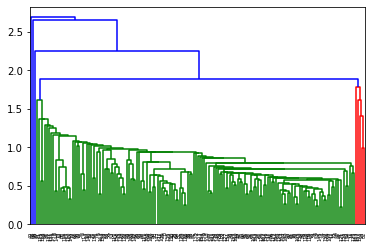

In [57]:
df_mergings=linkage(df,method='single',metric='euclidean')
dendrogram(df_mergings)
plt.show()

##### Complete Linkage-Defines distance between two clusters as the maximum distance between any two points of the two clusters

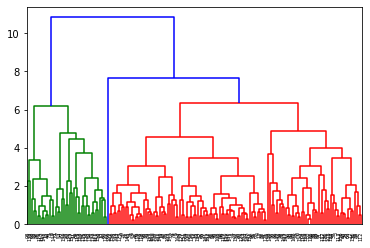

In [58]:
df_mergings=linkage(df,method='complete',metric='euclidean')
dendrogram(df_mergings)
plt.show()

In [59]:
#k=4
cut_tree(df_mergings,n_clusters=4)

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [2],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [3],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [0],
       [2],
    

In [60]:
hierarchial_clusterid=cut_tree(df_mergings,n_clusters=4).reshape(-1, )
hierarchial_clusterid

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       3, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [61]:
countrydata_hiermeans['hierarchical_clusterid']=hierarchial_clusterid
countrydata_hiermeans.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,hierarchical_clusterid
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553,55.0,42.0,248.0,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090,1145.0,268.0,1988.0,1
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460,1713.0,186.0,1400.0,1
3,Angola,119.0,5900.0,20.87,60.1,6.16,3530,2199.0,101.0,1514.0,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200,5551.0,736.0,7186.0,1


##### Summary Statistics of the distribution of the clusters identified using Hierarchical Clustering

In [62]:
#Summary of the volume each hierarchial cluster comprises of
countrydata_hiermeans.hierarchical_clusterid.value_counts()

1    79
0    47
2    40
3     1
Name: hierarchical_clusterid, dtype: int64

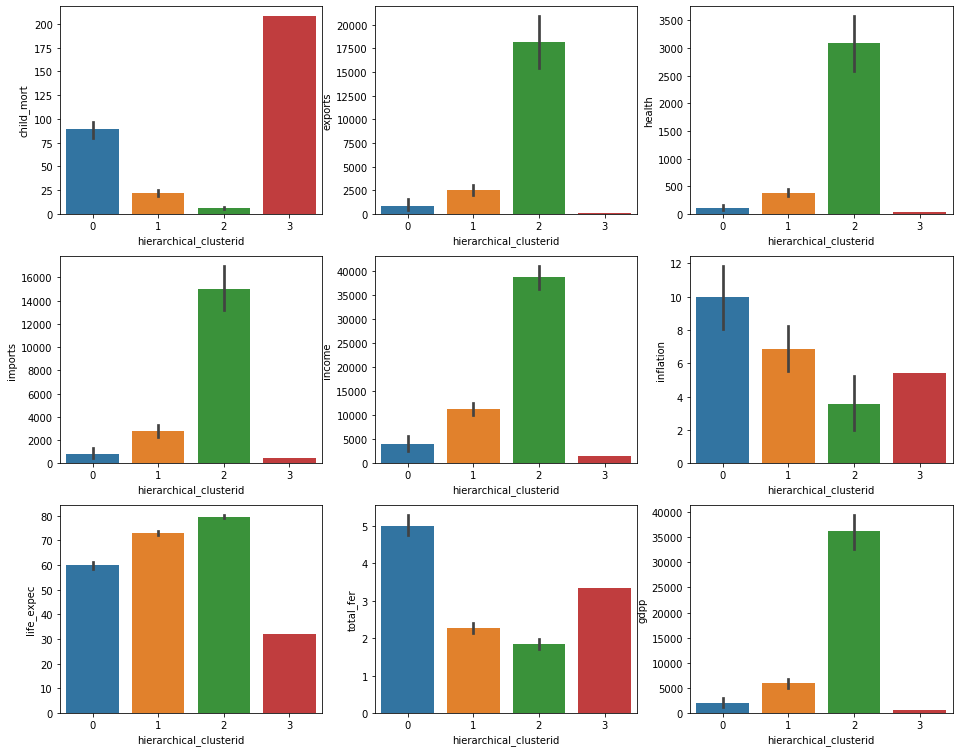

In [63]:
#Behavioral feature of each variable across each cluster
fig, axs = plt.subplots(3,3,figsize = (16,13))

sns.barplot(x=countrydata_hiermeans.hierarchical_clusterid, y=countrydata_hiermeans.child_mort, ax = axs[0,0])
sns.barplot(x=countrydata_hiermeans.hierarchical_clusterid, y=countrydata_hiermeans.exports, ax = axs[0,1])
sns.barplot(x=countrydata_hiermeans.hierarchical_clusterid, y=countrydata_hiermeans.health, ax = axs[0,2])
sns.barplot(x=countrydata_hiermeans.hierarchical_clusterid, y=countrydata_hiermeans.imports, ax = axs[1,0])
sns.barplot(x=countrydata_hiermeans.hierarchical_clusterid, y=countrydata_hiermeans.income, ax = axs[1,1])
sns.barplot(x=countrydata_hiermeans.hierarchical_clusterid, y=countrydata_hiermeans.inflation, ax = axs[1,2])
sns.barplot(x=countrydata_hiermeans.hierarchical_clusterid, y=countrydata_hiermeans.life_expec, ax = axs[2,0])
sns.barplot(x=countrydata_hiermeans.hierarchical_clusterid, y=countrydata_hiermeans.total_fer, ax = axs[2,1])
sns.barplot(x=countrydata_hiermeans.hierarchical_clusterid, y=countrydata_hiermeans.gdpp, ax = axs[2,2])
plt.show()


### Inferences with 3 clusters identified using Hierarchical Clustering

Distribution of datapoints in 3 clusters:
Cluster 0= 108 datapoints
Cluster 1= 58 datapoints &,
Cluster 2= 1 datapoint.
Cluster 2 has the lowest range of datapoint distribution consistently for all the socio-economic factors. Cluster 1 comprises of datapoints that have high exports, imports, income, health expenditure per capita,and nominal GDP as compared to cluster 0. Cluster 0 exceeds cluster 1 with reference to fertility rate, life expectancy, inflation, and child mortality rate.

Since the distribution of datapoints in the 3 clusters technically make the data be represented in two clusters, hence iterating the clustering with 4 clusters. Distribution of datapoints in 4 clusters:
Cluster 0= 79 datapoints
Cluster 1= 47 datapoints
Cluster 2= 40 datapoint &,
Cluster 3= 1 datapoint

### Visual Inferences with 4 clusters identified using Hierarchical Clustering

#### Relationship between the features that are to be used for customer profiling

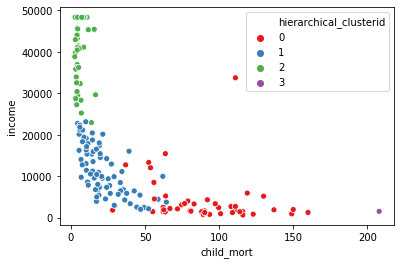

In [64]:
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'hierarchical_clusterid', data = countrydata_hiermeans, palette = 'Set1')

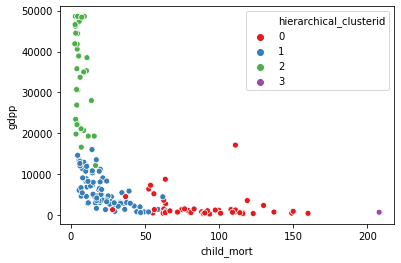

In [65]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'hierarchical_clusterid', data = countrydata_hiermeans, palette = 'Set1')

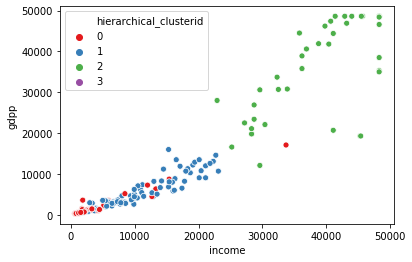

In [66]:
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'hierarchical_clusterid', data = countrydata_hiermeans, palette = 'Set1')

## Step8: Cluster Profiling_Hierarchical Clustering.Identified clusters k=4

In [67]:
countrydata_hiermeans.drop('country',axis=1).groupby('hierarchical_clusterid').mean()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports
hierarchical_clusterid,,,,,,,,,
0,89.134043,3948.361702,9.983723,59.817021,5.007174,1935.744681,895.574468,116.297872,835.574468
1,22.227848,11249.240506,6.832139,72.830380,2.271646,5884.455696,2512.936709,384.810127,2764.924051
2,5.945000,38815.250000,3.569300,79.642500,1.830750,36182.250000,18126.622500,3085.285000,15006.812500
3,208.000000,1500.000000,5.450000,32.100000,3.330000,662.000000,101.000000,46.000000,428.000000


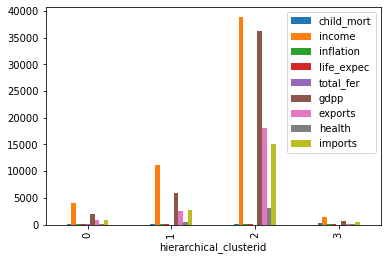

In [68]:
countrydata_hiermeans.groupby('hierarchical_clusterid').mean().plot(kind='bar')

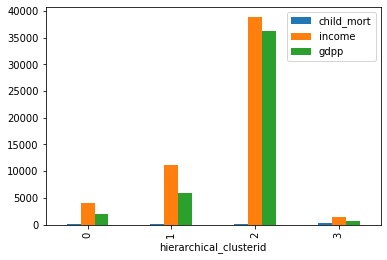

In [69]:
# For efficient cluster profiling, reducing cluster features to:
#'child mortality rate', 'nominal GDP', & 'net income per person' 
countrydata_hiermeans.drop(['country', 'exports','health','imports','inflation','life_expec','total_fer'],
                        axis=1).groupby('hierarchical_clusterid').mean().plot(kind='bar')

In [70]:
#Summary of the volume each hierarchial cluster comprises of
countrydata_hiermeans.hierarchical_clusterid.value_counts()

1    79
0    47
2    40
3     1
Name: hierarchical_clusterid, dtype: int64

Since cluster 3 has only 1 datapoint, next cluster that requires attention w.r.t teh business case is cluster 0.
Since it displays lowest data distribution for varibales identified for cluster profiling,
filtering & sorting data for cluster0 


In [71]:
countrydata_hiermeans[countrydata_hiermeans['hierarchical_clusterid']==0].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True])

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,hierarchical_clusterid
132,Sierra Leone,160.0,1220.0,17.200,55.0,5.2000,399,67.0,52.0,138.0,0
32,Chad,150.0,1930.0,6.390,56.5,6.5636,897,330.0,41.0,390.0,0
31,Central African Republic,149.0,888.0,2.010,47.5,5.2100,446,53.0,18.0,118.0,0
97,Mali,137.0,1870.0,4.370,59.5,6.5500,708,161.0,35.0,249.0,0
113,Nigeria,130.0,5150.0,20.870,60.5,5.8400,2330,589.0,118.0,405.0,0
112,Niger,123.0,814.0,2.550,58.8,6.5636,348,77.0,18.0,171.0,0
3,Angola,119.0,5900.0,20.870,60.1,6.1600,3530,2199.0,101.0,1514.0,0
37,"Congo, Dem. Rep.",116.0,609.0,20.800,57.5,6.5400,334,137.0,26.0,166.0,0
25,Burkina Faso,116.0,1430.0,6.810,57.9,5.8700,575,110.0,39.0,170.0,0
64,Guinea-Bissau,114.0,1390.0,2.970,55.6,5.0500,547,82.0,46.0,193.0,0


### By Hierarchical Clustering Method: Final List of top countries identified to have qualified for the aid.

In [72]:
countrydata_hiermeans[countrydata_hiermeans['hierarchical_clusterid']==0].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(5)

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports,health,imports,hierarchical_clusterid
132,Sierra Leone,160.0,1220.0,17.20,55.0,5.2000,399,67.0,52.0,138.0,0
32,Chad,150.0,1930.0,6.39,56.5,6.5636,897,330.0,41.0,390.0,0
31,Central African Republic,149.0,888.0,2.01,47.5,5.2100,446,53.0,18.0,118.0,0
97,Mali,137.0,1870.0,4.37,59.5,6.5500,708,161.0,35.0,249.0,0
113,Nigeria,130.0,5150.0,20.87,60.5,5.8400,2330,589.0,118.0,405.0,0


# End of Coding